In [634]:
import numpy as np
import matplotlib.pyplot as plt

In [635]:
def get_theta(theta_tprev, P_tprev, phi, y):
    theta_t = theta_tprev + (P_tprev @ phi) / (1 + np.transpose(phi) @ P_tprev @ phi) * (y - np.transpose(phi) @ theta_tprev)
    return theta_t

def get_P(P_tprev, phi):
    P_t = P_tprev - (P_tprev @ phi @ np.transpose(phi) @ P_tprev) / (1 + np.transpose(phi) @ P_tprev @ phi)
    return P_t

In [636]:
phi1 = np.array([[3],[2]])
phi2 = np.array([[1],[1]])
phi3 = np.array([[4],[-6]])
phi4 = np.array([[2],[1]])
phi5 = np.array([[2], [2]])
phi = (phi1, phi2, phi3, phi4, phi5)

y  = (y1, y2, y3, y4, y5) = (6, 1, -3, 4, 3)

In [637]:
P0 = 10000000*np.eye(2)
theta0 = np.array([[0],[0]])

Verify that its correct by doing exercise 1 purely recursively

In [638]:
theta1 = get_theta(theta0, P0, phi1, y1)
P1 = get_P(P0, phi1)
theta2 = get_theta(theta1, P1, phi2, y2)
P2 = get_P(P1, phi2)
theta3 = get_theta(theta2, P2, phi3, y3)
P3 = get_P(P2, phi3)
theta4 = get_theta(theta3, P3, phi4, y4)
P4 = get_P(P3, phi4)
theta5 = get_theta(theta4, P4, phi5, y5)
P5 = get_P(P4, phi5)
print(theta5)

[[0.98198198]
 [1.12612612]]


### Exercise 3

In [639]:
def get_theta_weighted(theta_tprev, P_tprev, phi, y, alpha):
    theta_t = theta_tprev + (P_tprev @ phi) / (alpha + np.transpose(phi) @ P_tprev @ phi) * (y - np.transpose(phi) @ theta_tprev)
    return theta_t

def get_P_weighted(P_tprev, phi, alpha):
    P_t = (1/alpha)*(P_tprev - (P_tprev @ phi @ np.transpose(phi) @ P_tprev) / (alpha + np.transpose(phi) @ P_tprev @ phi))
    return P_t

In [640]:
P0 = 1000000*np.eye(3)
theta0 = np.array([[0],[0],[0]])

In [641]:
u = np.loadtxt("associated_files/input_u_a.txt")
y = np.loadtxt("associated_files/output_y_a.txt")
# pad output with zeros
print(u.shape)
print(y.shape)
y = np.pad(y, (2, 0), 'constant', constant_values=(0))
print(u)

(32,)
(30,)
[ 1.9915826  -0.11926236 -0.27272839  1.4444549  -0.07441329 -0.36251346
 -0.77703176 -0.25011256 -0.41868261  1.4148801  -0.84739085  0.16613039
 -0.04819016 -2.9772241   1.006999    0.88436946 -0.40586253 -2.6191711
 -0.96858939  0.55532344  0.75945426 -0.57204786  1.1580491  -0.3080004
  0.00317089 -1.4060613   1.6240944   0.13962039 -1.8166435  -2.789151
  0.26241461  0.11922209]


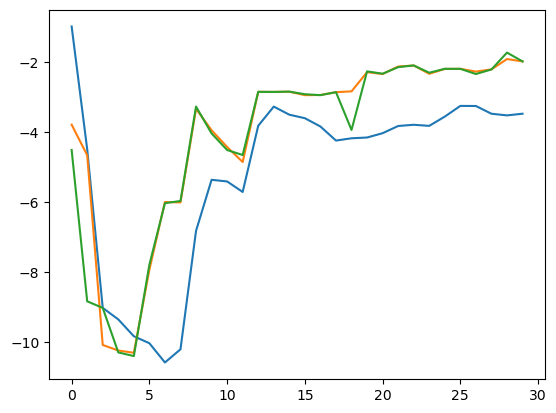

In [642]:
thetas = []
alpha = 1
P = P0
theta = theta0
thetas.append(theta)

for t in range(2, len(y)):
    P_prev = P
    theta_prev = theta
    phi = np.array([[u[t]], [u[t-1]], [u[t-2]]])
    theta = get_theta_weighted(theta_prev, P_prev, phi, y[t], alpha)
    P = get_P_weighted(P_prev, phi, alpha)
    thetas.append(theta)
thetas = np.asarray(thetas)
plt.plot(thetas[:,0,0])
plt.plot(thetas[:,1,0])
plt.plot(thetas[:,2,0])